# генераторы данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[1 1]
 [1 2]
 [2 1]
 [7 8]
 [6 7]]


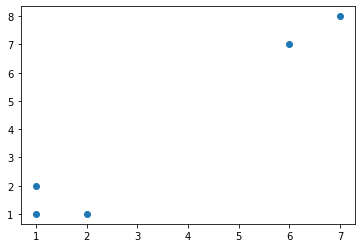

In [2]:
X = np.array([[1,1],[1,2],[2,1],[7,8],[6,7]])

print(X)

plt.scatter(X[:,0],X[:,1])
plt.show()

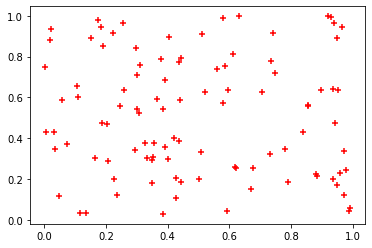

In [3]:
X = np.random.rand(100,2)

plt.scatter(X[:,0],X[:,1],c='r',marker='+')
plt.show()

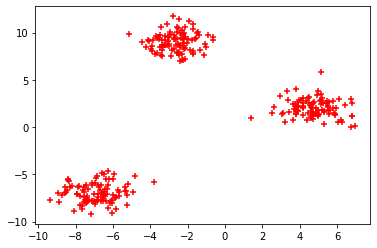

In [16]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, random_state=42)

plt.scatter(X[:,0],X[:,1],c='r',marker='+')
plt.show()

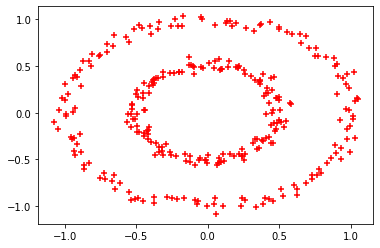

In [29]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=.5, noise=.04)

plt.scatter(X[:,0],X[:,1],c='r',marker='+')
plt.show()

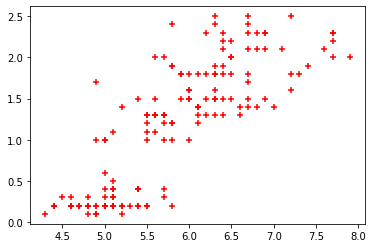

<ipython-input-2-cca9ebd02a55>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


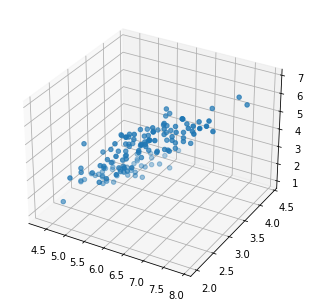

In [2]:
from sklearn.datasets import load_iris
X = load_iris()['data']
X = load_iris().data

plt.scatter(X[:,0],X[:,3],c='r',marker='+')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

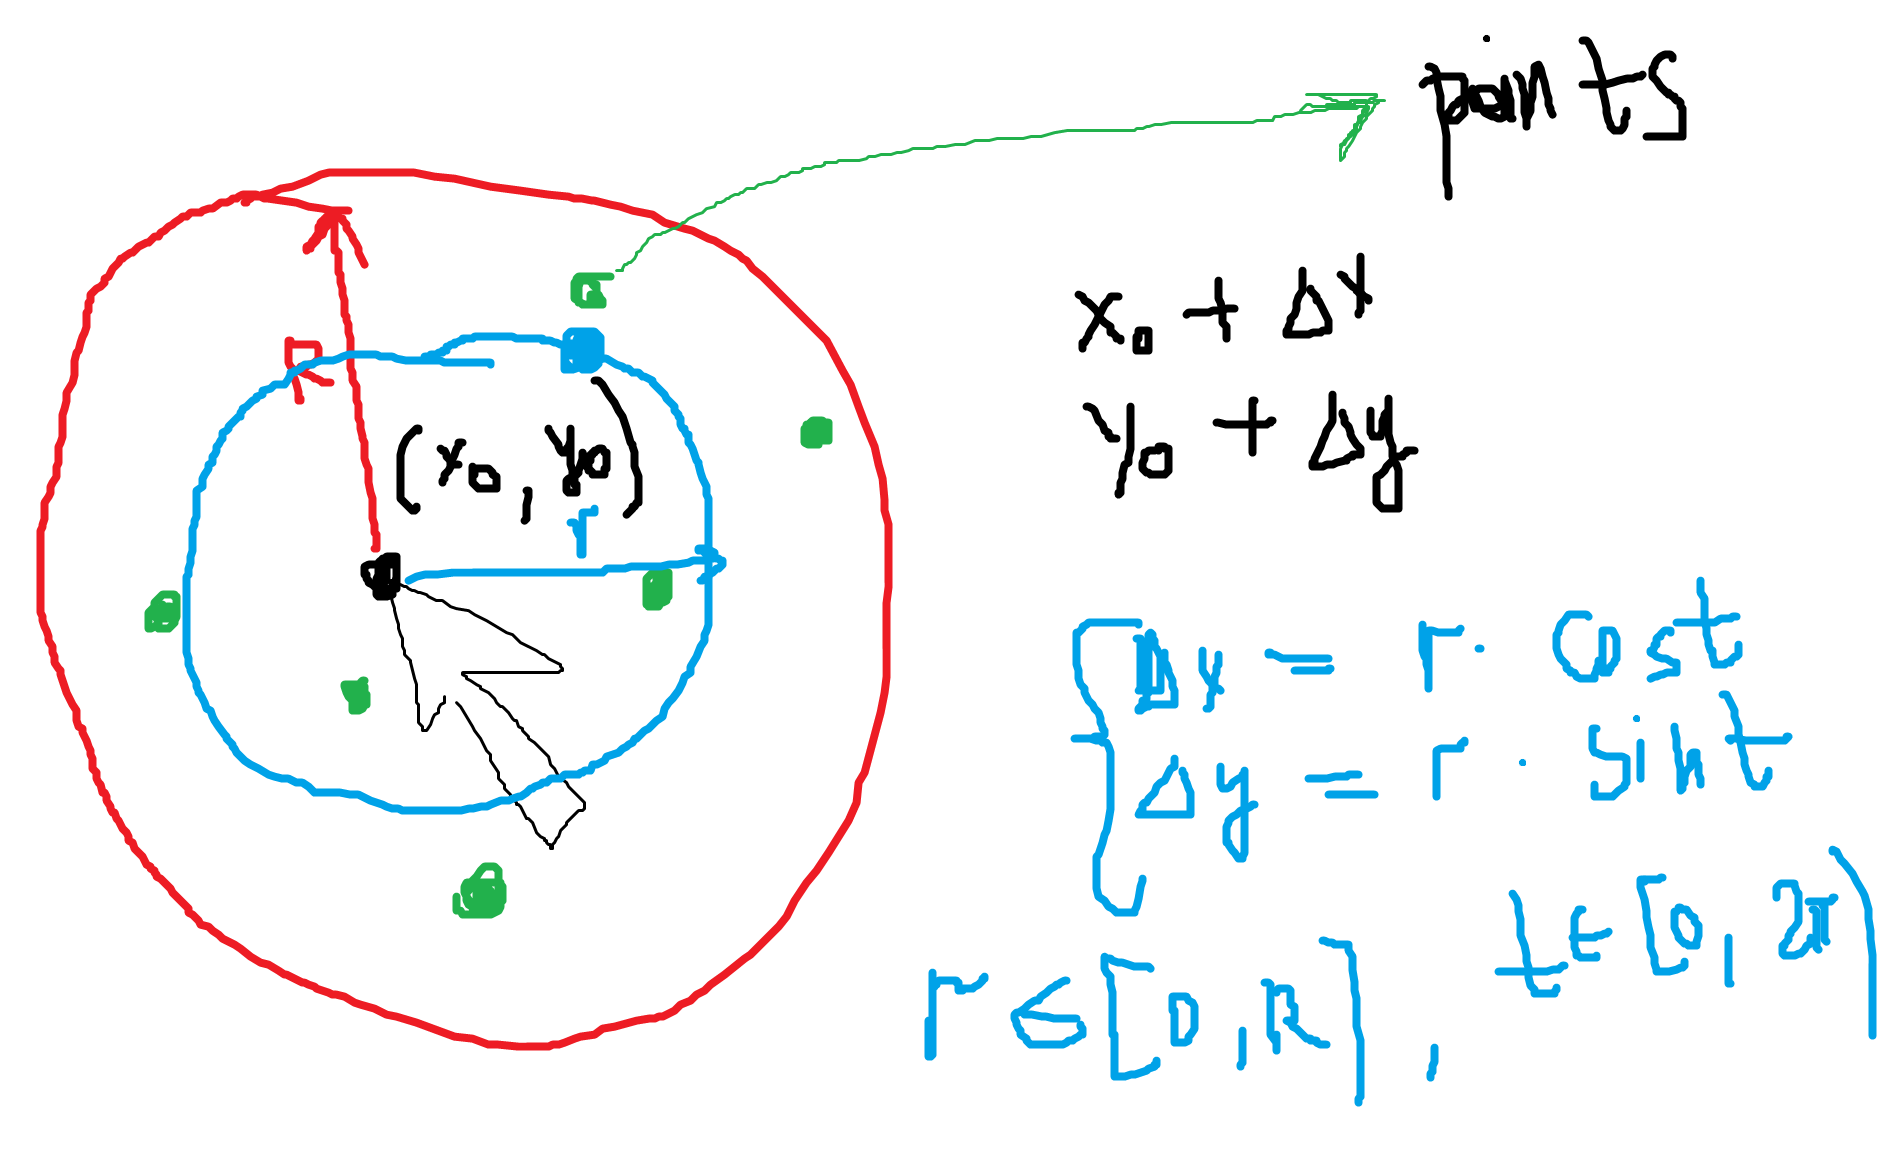

pygame 2.0.1 (SDL 2.0.14, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


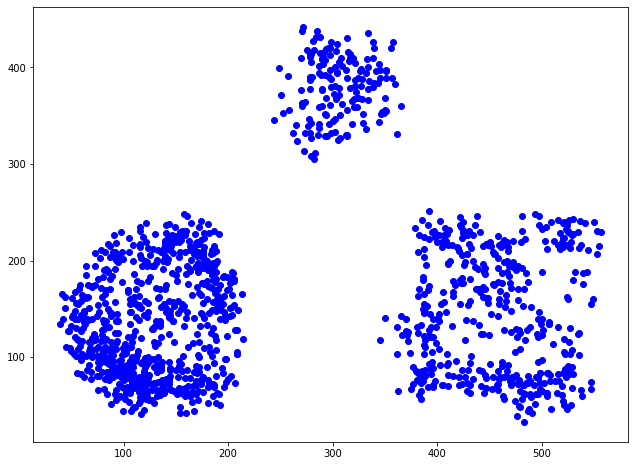

In [3]:
import pygame

points = np.empty((0,2), dtype='f')

c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, 30)
        t = np.random.uniform(0, 2*np.pi)
        coord = [x+r*np.cos(t), y+r*np.sin(t)]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

# k-means

[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
['yellow' 'brown' 'red' 'yellow' 'green']


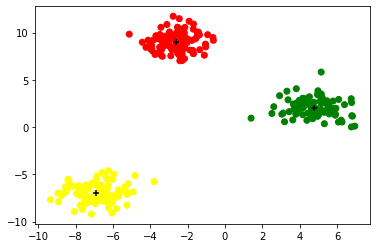

array([0, 2])

In [55]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, random_state=42)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

color_list = np.array(['red','yellow','green','blue','brown','pink','black','#f2890a'])
print(color_list[[1,4,0,1,2]])

plt.scatter(X[:,0],X[:,1],c=color_list[labels])
plt.scatter(centroids[:,0],centroids[:,1],c='black',marker='+')
plt.show()

kmeans.predict([[-6,10],[5,-2]])

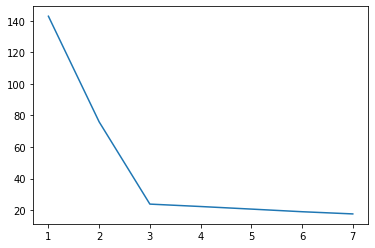

In [58]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1,8),inertia)
plt.show()

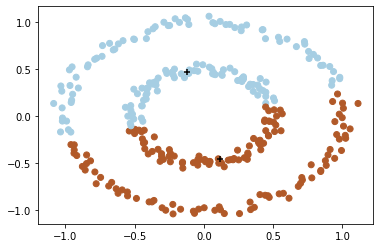

In [63]:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=300, factor=.5, noise=.04)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=labels,cmap=plt.cm.Paired)
plt.scatter(centroids[:,0],centroids[:,1],c='black',marker='+')
plt.show()

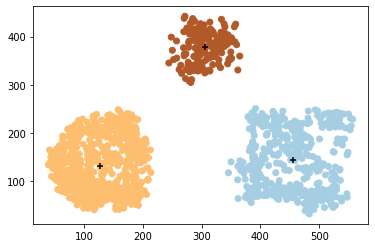

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(points)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(points[:,0],points[:,1],c=labels,cmap=plt.cm.Paired)
plt.scatter(centroids[:,0],centroids[:,1],c='black',marker='+')
plt.show()

# сжатие цветового пространства изображения

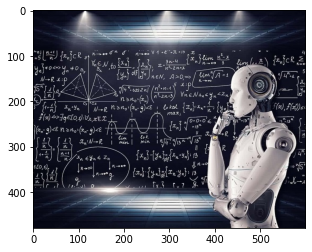

(479, 600, 3)
[[[ 6  8 21]
  [ 6  8 21]
  [ 6  8 21]
  ...
  [ 8 10 23]
  [ 8 10 23]
  [ 8 10 23]]

 [[ 6  8 21]
  [ 6  8 21]
  [ 6  8 21]
  ...
  [ 8 10 23]
  [ 8 10 23]
  [ 8 10 23]]

 [[ 6  8 21]
  [ 6  8 21]
  [ 6  8 21]
  ...
  [ 8 10 23]
  [ 8 10 23]
  [ 8 10 23]]

 ...

 [[ 5  7 20]
  [ 5  7 20]
  [ 5  7 20]
  ...
  [ 6  8 21]
  [ 6  8 21]
  [ 6  8 21]]

 [[ 5  7 20]
  [ 5  7 20]
  [ 5  7 20]
  ...
  [ 5  7 20]
  [ 5  7 20]
  [ 5  7 20]]

 [[ 5  7 20]
  [ 5  7 20]
  [ 5  7 20]
  ...
  [ 4  6 19]
  [ 4  6 19]
  [ 4  6 19]]]


In [3]:
from matplotlib.image import imread

orig_img = imread('data/01.jpg')
plt.imshow(orig_img)
plt.show()
print(orig_img.shape)
print(orig_img)

(287400, 3)


<ipython-input-5-05012665538e>:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


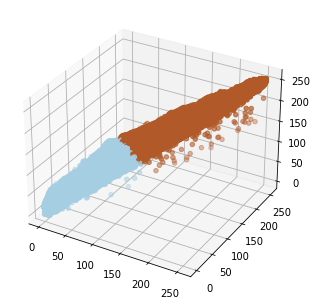

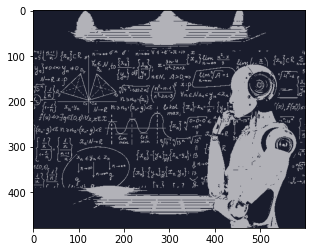

In [5]:
X = orig_img.reshape((479*600, 3))
X = orig_img.reshape((-1, orig_img.shape[-1]))
print(X.shape)

n_color = 2

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_color).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=labels,cmap=plt.cm.Paired)
plt.show()

new_img = centroids[labels].astype('int').reshape(orig_img.shape)
plt.imshow(new_img)
plt.show()

## Класс K_Means

[]
[[132.1982    59.878155]
 [100.90367   86.12151 ]
 [ 95.7705    58.689293]]
2.0
[0 1 2 ... 1 1 1]
[[368.35892  128.59898 ]
 [160.7484   205.1238  ]
 [ 99.50172   61.917366]]
5


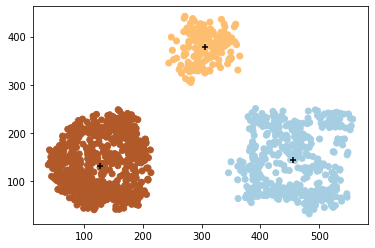

In [44]:
class K_Means():
    
    def __init__(self, dataset, n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype='f')
        self.labels = np.array([], dtype='i')
        self.fitted = False
        self.max_n_iter = 100
        self.tolerance = .01
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def distribute_data(self):
        self.labels = np.array([], dtype='i')
        for data in self.dataset:
            #print(np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            self.labels = np.append(self.labels,\
                                   np.array([self.get_dist(data,center) \
                                             for center in self.centroids]).argmin())
            
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k,label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    def fit(self):
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                print(iter)
                break
            iter += 1
        self.fitted = True
        
    def predict(self, list2d):
        '''
        return list1d -> [0, 1, 0, 2, ...]
        '''
        
        
kmeans = K_Means(points, n_clusters=3)
print(kmeans.labels)
print(kmeans.centroids)

print(kmeans.get_dist([0,0,0,1],[1,1,1,0]))

kmeans.distribute_data()
print(kmeans.labels)

kmeans.recalculate_centroids()
print(kmeans.centroids)

kmeans.fit()

plt.scatter(points[:,0],points[:,1],c=kmeans.labels,cmap=plt.cm.Paired)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c='black',marker='+')
plt.show()

## Метрики

<b>Евклидово расстояние.</b>  Геометрическое расстояние в многомерном пространстве, вычисляется следующим образом:
$$\rho(x,y) = \sqrt{\sum\limits_i (x_i - y_i)^2}$$

<b>Квадрат евклидова расстояния.</b>  Для придания большего веса более отдаленным друг от друга объектам:
$$\rho(x,y) = \sum\limits_i (x_i - y_i)^2$$
    
<b>Расстояние городских кварталов (манхэттенское расстояние).</b> Это расстояние является просто средним разностей по координатам. В большинстве случаев эта мера расстояния приводит к таким же результатам, как и для обычного расстояния Евклида. Однако отметим, что для этой меры влияние отдельных больших разностей (выбросов) уменьшается (так как они не возводятся в квадрат). Манхэттенское расстояние вычисляется по формуле:
$$\rho(x,y) = \sum\limits_i |x_i - y_i|$$
    
<b>Расстояние Чебышева.</b> Это расстояние может оказаться полезным, когда желают определить два объекта как "различные", если они различаются по какой-либо одной координате (каким-либо одним измерением). Расстояние Чебышева вычисляется по формуле:
$$\rho(x,y) = \max\limits_i |x_i - y_i|$$
    
<b>Степенное расстояние.</b> Иногда желают прогрессивно увеличить или уменьшить вес, относящийся к размерности, для которой соответствующие объекты сильно отличаются. Это может быть достигнуто с использованием степенного расстояния. Степенное расстояние вычисляется по формуле:
$$\rho(x,y) = \left( \sum\limits_i |x_i - y_i|^p \right)^{1/r}$$
